# DOHMH MenuStat Historical

* [data.cityofnewyork.us](https://data.cityofnewyork.us/Health/DOHMH-MenuStat-Historical-/qgc5-ecnb)


* [menustat.org](https://www.menustat.org/data.html)
* [Dataset](https://data.cityofnewyork.us/api/views/qgc5-ecnb/rows.csv?date=20231011&accessType=DOWNLOAD) (auto-download)</br>
* [Data Dictionary](https://data.cityofnewyork.us/api/views/qgc5-ecnb/files/a809c011-fd64-46ef-8b6c-fdfaa9a8148c?download=true&filename=DOHMH_MenuStat_DD.xlsx) (auto-download)

* x[Question Matrix]()</br>
* x[Questionnaire]()</br>
* x[Codebook]()</br>


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# pd.options.display.float_format = "{:,.0f}".format
%matplotlib inline

In [2]:
df = pd.read_csv("DOHMH_MenuStat__Historical__20231011.csv", low_memory=False)

In [16]:
df.iloc[:5,:20]

,Menu_Item_ID,Year,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,Potassium,Carbohydrates
0,35005,2017,7 Eleven Mocha Iced Coffee,7 Eleven,1,Mocha Iced Coffee,"Mocha Iced Coffee, Chillers Iced Coffee, Drinks",Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35008,2017,7 Eleven French Vanilla Iced Coffee,7 Eleven,1,French Vanilla Iced Coffee,"French Vanilla Iced Coffee, Chillers Iced Coff...",Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35027,2017,7 Eleven French Vanilla Cappuccino,7 Eleven,1,French Vanilla Cappuccino,"French Vanilla Cappuccino, Coffee, Drinks, Fla...",Beverages,8,NaN,fl oz,NaN,190,6,6,0,0,190,NaN,34
3,35028,2017,7 Eleven Peppermint Mocha,7 Eleven,1,Peppermint Mocha,"Peppermint Mocha, Coffee, 8 fl oz",Beverages,8,NaN,fl oz,NaN,180,4,4,0,0,180,NaN,36
4,35029,2017,7 Eleven Pumpkin Spice Latte,7 Eleven,1,Pumpkin Spice Latte,"Pumpkin Spice Latte, Coffee, 8 fl oz",Beverages,8,NaN,fl oz,NaN,190,6,6,0,0,190,NaN,35


In [21]:
# df.iloc[:5,20:40]

In [22]:
# df.iloc[:5,40:]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65219 entries, 0 to 65218
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu_Item_ID            65219 non-null  int64  
 1   Year                    65219 non-null  int64  
 2   Restaurant_Item_Name    65219 non-null  object 
 3   restaurant              65219 non-null  object 
 4   Restaurant_ID           65219 non-null  int64  
 5   Item_Name               65219 non-null  object 
 6   Item_Description        65219 non-null  object 
 7   Food_Category           65219 non-null  object 
 8   Serving_Size            26899 non-null  float64
 9   Serving_Size_text       39 non-null     object 
 10  Serving_Size_Unit       26927 non-null  object 
 11  Serving_Size_household  15238 non-null  object 
 12  Calories                55315 non-null  float64
 13  Total_Fat               54846 non-null  float64
 14  Saturated_Fat           54143 non-null

In [38]:
# df.isnull().sum()

In [24]:
df.describe()

,Menu_Item_ID,Year,Restaurant_ID,Serving_Size,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,...,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g,Kids_Meal,Limited_Time_Offer,Regional,Shareable
count,"65,219","65,219","65,219","26,899","55,315","54,846","54,143","51,503","53,219","54,991",...,"25,853",623,"25,592","25,531","25,207","25,391","65,219","65,219","65,219","65,219"
mean,"103,164","2,017",53,92,380,17,6,0,57,687,...,292,134,15,5,8,1,0,0,0,0
std,"60,360",0,27,173,421,25,13,11,105,"1,064",...,"1,448",120,20,7,16,3,0,0,0,0
min,7,"2,017",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,"39,362","2,017",30,12,130,0,0,0,0,80,...,12,37,6,0,1,0,0,0,0,0
50%,"122,345","2,017",56,24,270,9,4,0,20,310,...,60,117,12,2,5,0,0,0,0,0
75%,"156,752","2,018",79,98,500,23,9,0,69,930,...,475,198,19,7,11,1,0,0,0,0
max,"179,840","2,018",94,"3,792","13,960","1,078","2,046","1,470","2,680","41,290",...,"209,000",561,"1,800",425,"1,800",400,1,1,1,1


In [29]:
df.restaurant.nunique()

96

In [39]:
# df.restaurant.unique()

In [32]:
df.Year.unique()

array([2017, 2018])

In [28]:
df.Item_Name.nunique()

46995

In [27]:
df.Item_Name.unique()

array(['Mocha Iced Coffee', 'French Vanilla Iced Coffee',
       'French Vanilla Cappuccino', ...,
       'Butter, Regular, for Junior Hot Hoagies',
       'Sweet Black Pepper Bacon Wake Up Wrap', 'Whiskey Smash'],
      dtype=object)

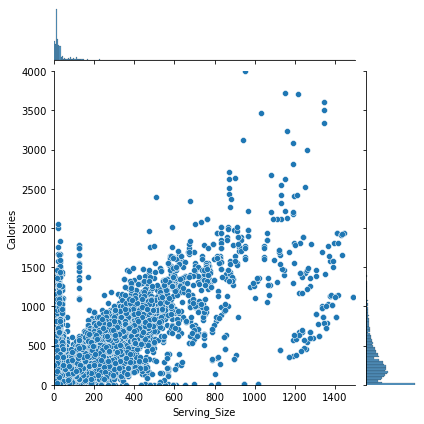

In [68]:
sns.jointplot(data=df, x='Serving_Size', y='Calories', kind='scatter', xlim=(0,1500), ylim=(0,4000));